## Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Challenge 1
## Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [11]:
def roll_dice(times=10):
    """This function returns a dataframe containing simulations of rolling a dice.
    The default amount is 10"""
    return pd.DataFrame({'random_dice':[np.random.randint(1,7) for i in range(times)]})

## Plot the results sorted by value.

In [12]:
# your code here
dice10 = roll_dice().sort_values(by='random_dice')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

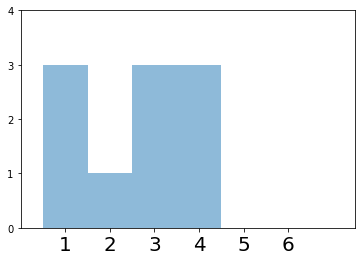

In [21]:
#ploting data
plt.hist(dice10.random_dice, alpha=0.5, bins=4)

#editing xlabel
xvalues = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
labels = [1,2,3,4,5,6]
plt.xticks(xvalues, labels, fontsize=20)
plt.xlim(0.5, 8,5)

plt.yticks(range(dice10.random_dice.value_counts().max()+2))

#printing result
plt.show()

# Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

## Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [161]:
def calc_mean(my_list):
    return sum(my_list)/len(my_list)    

## 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [174]:
def calc_freq(my_list):
    ''' this function takes a list of numbers and return a dictionary in which each key is a key, and the values are
    their respective count.
    '''
    my_dict = {}
    for number in my_list:
        if number not in my_dict.keys():
            my_dict[number] = 0
        else:
            my_dict[number] += 1
    return my_dict

def calc_mean_by_freq(my_list):
    ''' this function takse list of numbers and return the mean of them'''
    
    my_dict = calc_freq(my_list)
    sum_values = 0
    total_numbers = 0
    
    for key in my_dict.keys():
        
        sum_values += my_dict[key] * key
        total_numbers += my_dict[key]
    
    return sum_values/total_numbers

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [211]:
def fakenumpy_median(lista):
    lst = lista.copy()
    lst.sort()
    if len(lst) % 2 == 1:
        return lst[int(len(lst)/2 - 0.5)]
    else:
        return (lst[int(len(lst)/2)-1] + lst[int(len(lst)/2)])/2

In [212]:
fakenumpy_median([1,2,3,4,5,6,7,8,9,10,11])

6

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [235]:
def quartiles(lista):
    """Function that gets a list and return the quartiles Q1 (25%), Q2(50%), and Q3(75%) in a dictionary"""
    lst = lista.copy()
    lst.sort()

    q1 = fakenumpy_median(lst[0:round(len(lista)/2)+1])
    q2 = fakenumpy_median(lst)
    q3 = fakenumpy_median(lst[round(len(lista)/2)+1:-1])
    return {'25%':q1, '50%':q2,'75%':q3}

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

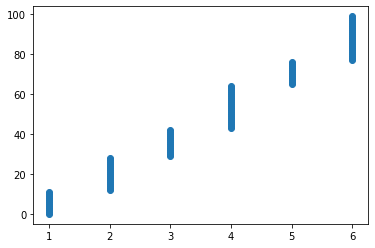

In [247]:
data = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col='Unnamed: 0')
data = data.value.sort_values()
plt.scatter(x=data,y=np.array(range(len(data))))
plt.show()

In [ ]:
'''comments'''

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [239]:
# your code here
mean = calc_mean(data)
mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [240]:
# your code here
freq = calc_freq(data)
freq

{1: 11, 2: 16, 3: 13, 4: 21, 5: 11, 6: 22}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

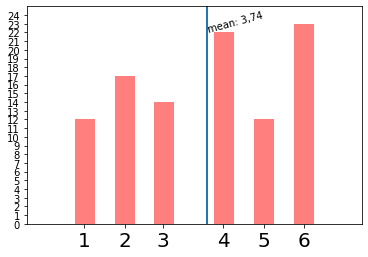

In [117]:
#ploting data
plt.hist(data.value, alpha=0.5, bins=12, color='red')
plt.bar(x=[3.77],height=30,width=0.05)

#editing xlabel
xvalues = np.array([1.2,2.05,2.85,4.1,4.95,5.80])
labels = [1,2,3,4,5,6]
plt.xticks(xvalues, labels, fontsize=20)
plt.xlim(0, 7)

plt.yticks(range(data.value.value_counts().max()+2))
plt.ylim([0,25])

plt.text(3.8, 22, 'mean: 3,74', ha='left', rotation=15, wrap=True)

#printing result
plt.show()

In [0]:
"""
Throwing dices results in a linear distribution in which all possible outcomes happen the same amount of times 
(when tending to infinity). So, after an infinite number of trials, we would have a mean of 3.5. The mean is 3.74
is close to 3.5, which makes sense. 
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

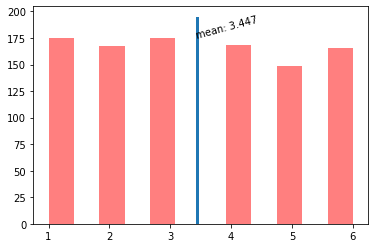

In [270]:
# your code here
df = pd.read_csv('../data/roll_the_dice_thousand.csv', index_col='Unnamed: 0')
df = df.value

#ploting data
plt.hist(df, alpha=0.5, bins=12, color='red')
tallness = df.value_counts().max() + 20
plt.bar(x=[df.mean()], height=tallness, width=0.05)

plt.text(df.mean(), tallness-20, f'mean: {df.mean()}', ha='left', rotation=15, wrap=True)

#printing result
plt.show()

In [0]:
"""
The distribution looks now more uniform, as we aproach high number of trials. The mean now is also closer to 3.5.

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [7]:
# your code here
pop1 = pd.read_csv('../data/ages_population.csv').observation
freq = calc_freq(pop1)

NameError: name 'calc_freq' is not defined

TypeError: unsupported operand type(s) for +: 'method' and 'int'

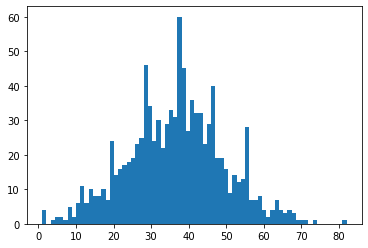

In [350]:
plt.hist(pop1,bins=len(pop1.unique()))
possivel_media = 38
possivel_desvio = 10
altura = pop1.value_counts().max + 20

plt.bar(x=[possivel_media], height=altura, width=0.5, color='red')
plt.text(possivel_media, altura, f'media = {possivel_media}?' + f'\ndesviopadrão:{possivel_desvio}?', ha='left', rotation=15, wrap=True)

plt.show()

In [ ]:
"""
Mean, maybe about 35? standard deviation, maybe about 11?
In a normal distribution, 3 standart deviations from the mean (left and right) englobes you 99,7% of the data.
Therefore, from the mean to the rest 99,7% would range from 2 to 70, so almost a distance of 34-35 points from the mean.
a 1/3 of it would be about 10-12...
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [303]:
# your code here
print(f'Média: {pop1.mean()}' + f'\nDesvio padrão: {pop1.std()}')

Média: 36.56
Desvio padrão: 12.81649962597677


In [0]:
"""
Yes they fall close from gessed (36.56 for a 35 and 12.8 for a guessed std of 11).
I might have gessed right since the plot seems to represent a normal distribution.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [4]:
# your code here
pop2 = pd.read_csv('../data/ages_population2.csv').observation

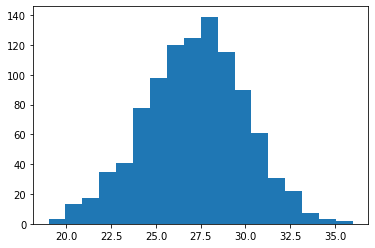

In [5]:
plt.hist(pop2,bins=len(pop2.unique()))
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [0]:
"""
the plot seems to be more "bell shaped" but we have less data.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [9]:
# your code here
print('step1:' + f'\nMédia: {pop1.mean()}' + f'\nDesvio padrão: {pop1.std()}')
print('\nstep2:' + f'\nMédia: {pop2.mean()}' + f'\nDesvio padrão: {pop2.std()}')

step1:
Média: 36.56
Desvio padrão: 12.81649962597677

step2:
Média: 27.155
Desvio padrão: 2.9698139326891835


In [0]:
"""
The medians are different, and the standart deviation in step2 is lower than step1
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

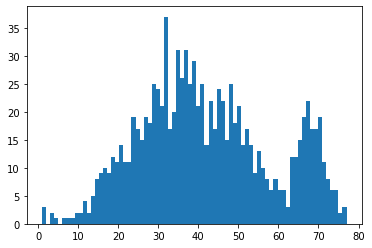

In [10]:
# your code here
pop3 = pd.read_csv('../data/ages_population3.csv').observation
plt.hist(pop3,bins=len(pop3.unique()))
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [12]:
# your code here
# your code here
print('step1:' + f'\nMédia: {pop1.mean()}' + f'\nDesvio padrão: {pop1.std()}')
print('\nstep3:' + f'\nMédia: {pop3.mean()}' + f'\nDesvio padrão: {pop3.std()}')

step1:
Média: 36.56
Desvio padrão: 12.81649962597677

step3:
Média: 41.989
Desvio padrão: 16.14470595986593


In [0]:
"""
The mean is grealy shifted and so is the standart deviation. The step3 distribution shows clearly not a normal distribution
as there are two "peaks", one at near 40 and another at 70. This shows how important is to see the data in plots
or do the EDA (exploratory, data, analysis). If it wasnt for the plot, it would be difficult to predict
a second peak on the plot!
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [90]:
data = pd.concat([pop1,pop2,pop3],axis=1)
data.columns = ['pop1','pop2','pop3']
df = pd.melt(data, value_vars=['pop1','pop2','pop3'])
df.columns = ['neighborhood','age']
res = data.describe().T.loc[:,['mean','min', '25%', '50%', '75%', 'max']]
print(res)

        mean   min   25%   50%   75%   max
pop1  36.560   1.0  28.0  37.0  45.0  82.0
pop2  27.155  19.0  25.0  27.0  29.0  36.0
pop3  41.989   1.0  30.0  40.0  53.0  77.0


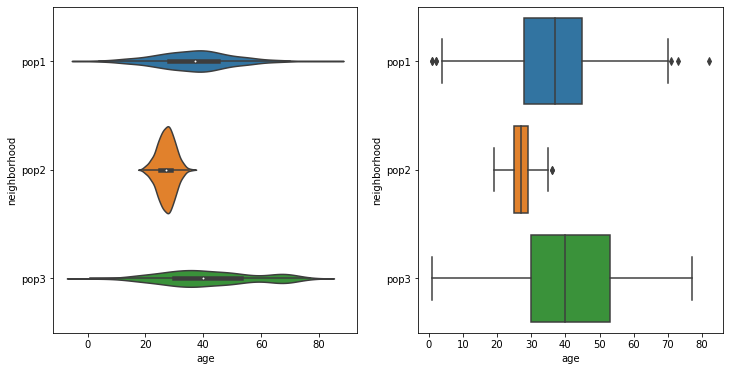

In [92]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(12,6))

plt.sca(axes[0])
sns.violinplot(data=df,x='age',y='neighborhood')

plt.sca(axes[1])
sns.boxplot(data=df,x='age',y='neighborhood')

plt.show()

In [88]:
resp = (res.loc[:,'mean'] - res.loc[:,'50%'])/res.loc[:,'50%'] *100
print(f'the mean from pop1 is {round(resp[0],2)}% higher from the median')
print(f'the mean from pop2 is {round(resp[1],2)}% higher from the median')
print(f'the mean from pop3 is {round(resp[2],2)}% higher from the median')

the mean from pop1 is -1.19% higher from the median
the mean from pop2 is 0.57% higher from the median
the mean from pop3 is 4.97% higher from the median


In [0]:
"""
The shape of the plot and how it is deviated from a normal distribution increasely impacts on who the median differs from
the mean, in those cases. Its more significant in pop3, since it has 2 peaks as shown on the distribution.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [0]:
"""
We can also see on how this impacts on the boxplots. We can notice, for example, on the pop3 boxplot.
The second peak makes the 50-75% lenght longer than the 25-50% part, which indicates that the mean is not 
on the same position of the median.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

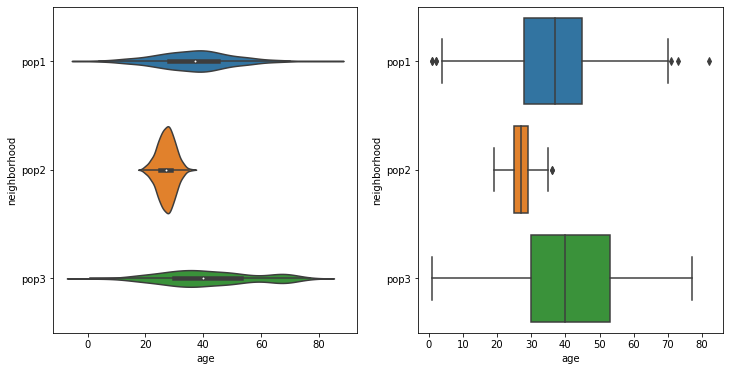

In [93]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

plt.sca(axes[0])
sns.violinplot(data=df,x='age',y='neighborhood')

plt.sca(axes[1])
sns.boxplot(data=df,x='age',y='neighborhood')

plt.show()

In [0]:
"""
Neighbor 1: an area where there are people of a wide number of ages, in which the distribution is close to normal

Neighbor 2: an area clearly with young people only, where people's age range from 19 to a max of 36. Maybe is an
student only neighboorhood? Who knows... From the 3 populatios, is the one with the best normal distribution.

neighbor 3: an area similar to the first one, but there is a greater presence of older people (60-80 years old). For
this reason, the distributions does not look normal, and therefore has the mean significantly away from the median.
Maybe it is an city with a great number of retired people.
"""